In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Neuron.NeuronNetwork import Model
from fonctions.activation_function import Sigmoid, LeakyRelu, Softmax
from fonctions.loss_function import BinaryCrossEntropy, ClassificationCrossEntropy

In [2]:
df_train = pd.read_csv('data/train_set.csv', header=None)
shuffled_df_train = df_train.sample(frac=1, random_state=42)

In [3]:
df_val = pd.read_csv('data/test_set.csv', header=None)
shuffled_df_val = df_val.sample(frac=1, random_state=42)

In [4]:
X_train = shuffled_df_train.drop(columns=30)
X_train = X_train.to_numpy()
Y_train = shuffled_df_train[[30]]
Y_train = Y_train.to_numpy()

X_val = shuffled_df_val.drop(columns=30)
X_val = X_val.to_numpy()
Y_val = shuffled_df_val[[30]]
Y_val = Y_val.to_numpy()

In [5]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

# Y_train = encoder.fit_transform(Y_train)
# Y_val = encoder.transform(Y_val)
# print("Y_train", Y_train)
# print("Y_val", Y_val)

In [6]:
train_set = (X_train, Y_train)
val_set = (X_val, Y_val)

In [7]:
model = Model()
model.add_layer(output_size=24, activation_function=LeakyRelu(), input_size=X_train.shape[1])
model.add_layer(output_size=24, activation_function=LeakyRelu())
model.add_layer(output_size=18, activation_function=LeakyRelu())
model.add_layer(output_size=18, activation_function=LeakyRelu())
model.add_layer(output_size=6, activation_function=LeakyRelu())
# model.add_layer(output_size=2, activation_function=Softmax())
model.add_layer(output_size=1, activation_function=Sigmoid())

In [8]:
model

Model:6 layers
Layer_0(input_size=30, output_size(neuron_count)=24, activation_function=LeakyRelu)
Layer_1(input_size=24, output_size(neuron_count)=24, activation_function=LeakyRelu)
Layer_2(input_size=24, output_size(neuron_count)=18, activation_function=LeakyRelu)
Layer_3(input_size=18, output_size(neuron_count)=18, activation_function=LeakyRelu)
Layer_4(input_size=18, output_size(neuron_count)=6, activation_function=LeakyRelu)
Layer_5(input_size=6, output_size(neuron_count)=1, activation_function=Sigmoid)

In [9]:
model.compile(loss_function=ClassificationCrossEntropy(), learning_rate=0.001)

In [10]:
model.train(train_set, val_set, epochs=10000, batch_size=16, verbose=True)

-- Epoch 1/10000 -- Loss_train: 0.2957 - Loss_val: 0.2874 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 2/10000 -- Loss_train: 0.2957 - Loss_val: 0.2875 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 3/10000 -- Loss_train: 0.2958 - Loss_val: 0.2875 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 4/10000 -- Loss_train: 0.2958 - Loss_val: 0.2876 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 5/10000 -- Loss_train: 0.2959 - Loss_val: 0.2876 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 6/10000 -- Loss_train: 0.2959 - Loss_val: 0.2877 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 7/10000 -- Loss_train: 0.2959 - Loss_val: 0.2877 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 8/10000 -- Loss_train: 0.2960 - Loss_val: 0.2878 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 9/10000 -- Loss_train: 0.2960 - Loss_val: 0.2878 -- Accuracy_train: 0.6238 - Accuracy_val: 0.6241 --
-- Epoch 1

In [11]:
train_loss_lst = model.train_loss_lst
val_loss_lst = model.val_loss_lst
train_accuracy_lst = model.train_accuracy_lst
val_accuracy_lst = model.val_accuracy_lst

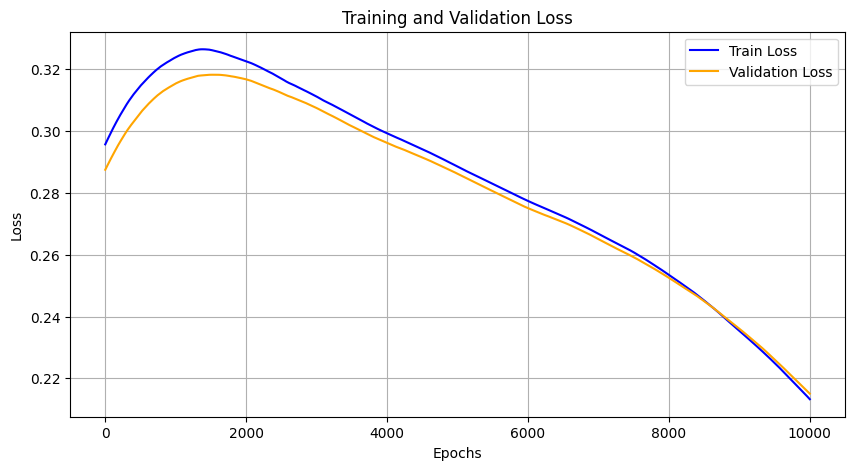

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_lst, label='Train Loss', color='blue')
plt.plot(val_loss_lst, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

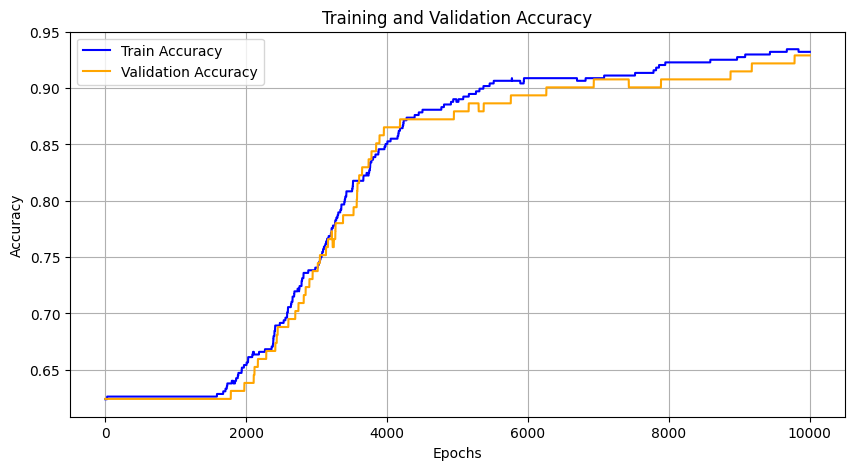

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_lst, label='Train Accuracy', color='blue')
plt.plot(val_accuracy_lst, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [14]:
model.save('model/model.h5')

In [15]:
model_loaded = Model.load('model/model.h5')

In [16]:
model.predict(X_val[:10])

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [17]:
Y_val[:10]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])